some playing around based on https://qrules.readthedocs.io/en/stable/usage/reaction.html

In [18]:
import qrules
from qrules.topology import Topology, Edge
from qrules import StateTransitionManager
from qrules.settings import InteractionType
from qrules.particle import Particle, load_pdg

I'm trying to simulate $p+p \rightarrow d + e^+ + \nu_e$

$d$ is not in the PDG database, we have to define it ourselves

In [24]:
particle_db = load_pdg()
d = Particle(
    name="d",
    pid=9999999,
    mass=1.87561294257,  # gev
    spin=1,
    isospin=(0, 0),
    c_parity=+1,
    # baryon_number=2,
)
particle_db.add(d)


first, a topology needs to be defined

In [9]:
topology = Topology(
    nodes=[0, 1],
    edges=enumerate(
        [
            Edge(None, 0),  # p
            Edge(None, 0),  # p
            Edge(1, None),  # d
            Edge(1, None),  # e^+
            Edge(1, None),  # nu
            Edge(0, 1),
        ],
        -2  # start of the enumeration
    )
)

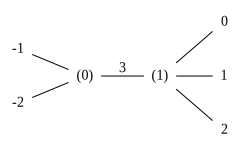

In [11]:
# visualize the topology
import graphviz

dot = qrules.io.asdot(
    topology,
    render_resonance_id=True,
    render_node=True,
    render_initial_state_id=True,
)
graphviz.Source(dot)

does this make sense? maybe, since this is also not a strict feynman diagram, should we ignore the 3-edge and have just one node?

create a statetransition manager:

In [27]:
stm = StateTransitionManager(
    initial_state=["p", "p"],
    final_state=["d", "e+", "nu(e)"],
    particle_db=particle_db
)
stm.set_allowed_interaction_types([InteractionType.WEAK])
stm.topologies = (topology,)

In [28]:
problem_sets = stm.create_problem_sets()
problem_sets

defaultdict(list,
            {1e-08: [ProblemSet(
                topology=Topology(
                  nodes=frozenset({0, 1}),
                  edges=FrozenDict({
                    -2: Edge(originating_node_id=None, ending_node_id=0),
                    -1: Edge(originating_node_id=None, ending_node_id=0),
                    0: Edge(originating_node_id=1, ending_node_id=None),
                    1: Edge(originating_node_id=1, ending_node_id=None),
                    2: Edge(originating_node_id=1, ending_node_id=None),
                    3: Edge(originating_node_id=0, ending_node_id=1),
                  }),
                ),
                initial_facts=MutableTransition(
                  topology=Topology(
                    nodes=frozenset({0, 1}),
                    edges=FrozenDict({
                      -2: Edge(originating_node_id=None, ending_node_id=0),
                      -1: Edge(originating_node_id=None, ending_node_id=0),
                      0: Edge(orig

In [30]:
reaction = stm.find_solutions(problem_sets)

dot = qrules.io.asdot(reaction, collapse_graphs=True)
graphviz.Source(dot)

Propagating quantum numbers:   0%|          | 0/48 [00:00<?, ?it/s]

RuntimeWarning: There are conservation rules that were not executed: identical_particle_symmetrization, gellmann_nishijima, isospin_validity, helicity_conservation, spin_magnitude_conservation, BaryonNumberConservation, spin_validity, MassConservation